<a target="_blank" href="https://colab.research.google.com/github/lukebarousse/Python_Data_Analytics_Course/blob/main/4_Problems/2_13_Matplotlib Format Charts.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

## 🟩 Subplots with Bar Charts (2.13.1)

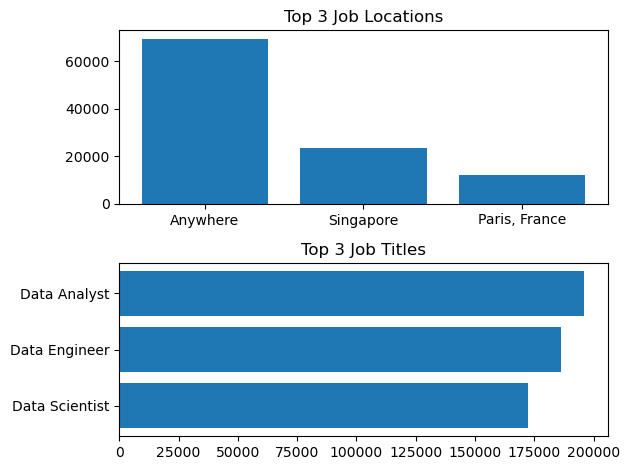

In [16]:
fig, ax = plt.subplots(2, 1)

job_locations = df['job_location'].value_counts().head(3)
ax[0].bar(job_locations.index, job_locations.values)
ax[0].set_title('Top 3 Job Locations')

job_title = df['job_title_short'].value_counts().head(3)
ax[1].barh(job_title.index, job_title.values)
ax[1].set_title('Top 3 Job Titles')
ax[1].invert_yaxis()

fig.tight_layout()



---

## 🟨 Subplots with Job Titles by Schedule (2.13.2)

In [17]:
# Code Needed
schedules = ['Full-time', 'Part-time', 'Contractor', 'Internship']

In [ ]:
for i, schedule_type in enumerate(schedules):
    df_schedule = df[df['job_schedule_type'] == schedule_type]
    job_titles = df_schedule['job_title_short'].value_counts().head(3)
    ax[i//2, i%2].bar(job_titles.index, job_titles.values)
    ax[i//2, i%2].set_title(f'Top 3 Job Titles ({schedules})')

fig.tight_layout()
plt.show()

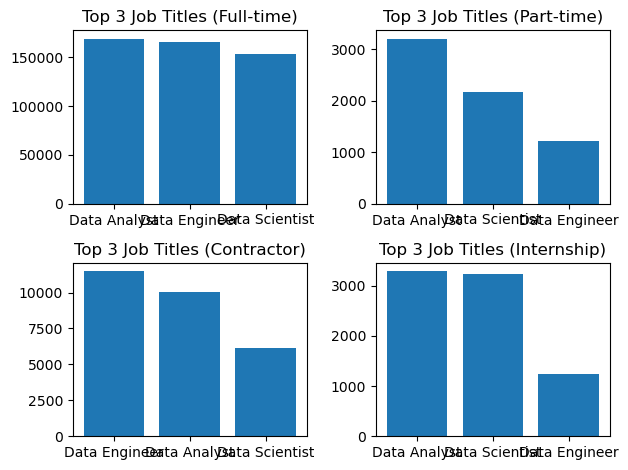

In [3]:
schedules = ['Full-time', 'Part-time', 'Contractor', 'Internship']

fig, ax = plt.subplots(2, 2)

for i, schedule_type in enumerate(schedules):
    df_schedule = df[df['job_schedule_type'] == schedule_type]
    job_titles = df_schedule['job_title_short'].value_counts().head(3)
    ax[i//2, i%2].bar(job_titles.index, job_titles.values)
    ax[i//2, i%2].set_title(f'Top 3 Job Titles ({schedule_type})')

fig.tight_layout()
plt.show()



---

## 🟥 Top Skills for Job Roles Subplots (2.13.3)

In [4]:
# Code Needed
job_roles = ['Senior Data Analyst', 'Senior Data Scientist', 'Senior Data Engineer']

In [10]:
df_skills = df.explode('job_skills')

In [11]:
skills_count = df_skills.groupby(['job_title_short', 'job_skills']).size()

In [12]:
skills_count = skills_count.reset_index(name='skill_count')

In [18]:
df_skills_count = skills_count.sort_values(by='skill_count', ascending=False)

In [19]:
df_skills_count

,job_title_short,job_skills,skill_count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
1166,Machine Learning Engineer,blazor,1
1175,Machine Learning Engineer,clickup,1
1213,Machine Learning Engineer,gatsby,1
567,Data Analyst,nuxt.js,1


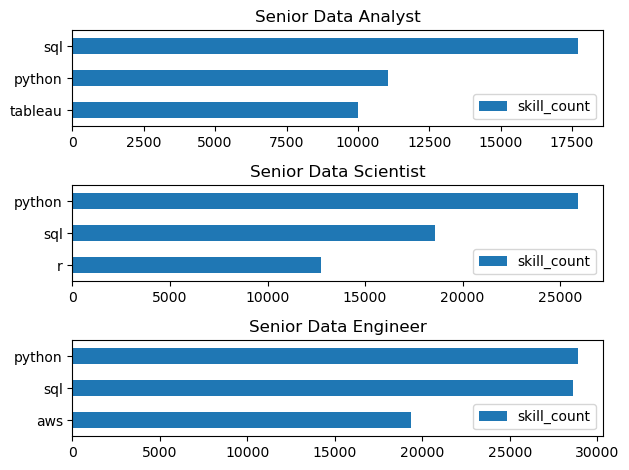

In [22]:
fig, ax = plt.subplots(3, 1)

for i, role in enumerate(job_roles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == role].head(3)
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=role)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')


fig.tight_layout()

---